<a href="https://colab.research.google.com/github/pkdvalis/fcc-projects/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('medical_examination.csv', index_col='id')

In [ ]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.describe()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['bmi'] = df['weight'] / ((df['height']/100)**2)
df.loc[df['bmi'] <= 25, 'overweight'] = 0
df.loc[df['bmi'] > 25, 'overweight'] = 1
df['overweight'] = df['overweight'].astype(int)

df


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1


In [ ]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

df.describe()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,27.556513,0.622086
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,6.091511,0.484870
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.374068,1.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,30.222222,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298.666667,1.000000


In [ ]:
df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1


In [ ]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.value_counts().sort_index().reset_index()
df_cat.columns = ['cardio', 'variable', 'value', 'total']
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


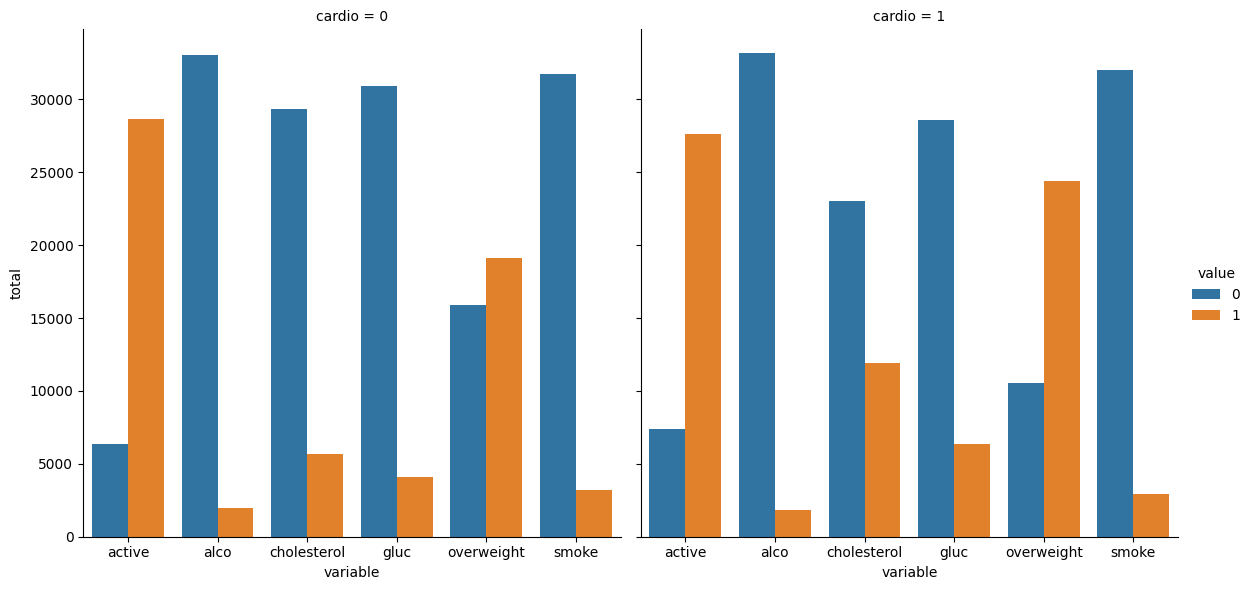

In [ ]:
# Draw the catplot with 'sns.catplot()'
sns.catplot(
    data=df_cat, x="variable", y="total", col="cardio",
    kind="bar", height=6, aspect=1, hue="value"
)
#fig.savefig('catplot.png')
#return fig



In [ ]:
# Clean the data
# Filter out the following patient segments that represent incorrect data:
# diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat = df_heat.drop(columns=['bmi'])


In [ ]:
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile

df_heat = df_heat[df['height'] >= df['height'].quantile(0.025)]
df_heat = df_heat[df['height'] <= df['height'].quantile(0.975)]
df_heat = df_heat[df['weight'] >= df['weight'].quantile(0.025)]
df_heat = df_heat[df['weight'] <= df['weight'].quantile(0.975)]
df_heat

<ipython-input-11-13bddaf3acc5>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df['height'] >= df['height'].quantile(0.025)]
<ipython-input-11-13bddaf3acc5>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df['height'] <= df['height'].quantile(0.975)]
<ipython-input-11-13bddaf3acc5>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df['weight'] >= df['weight'].quantile(0.025)]
<ipython-input-11-13bddaf3acc5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = df_heat[df['weight'] <= df['weight'].quantile(0.975)]


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1


In [ ]:
# Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). 
# Mask the upper triangle. The chart should look like examples/Figure_2.png.

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))
#corr.max().sort_values()



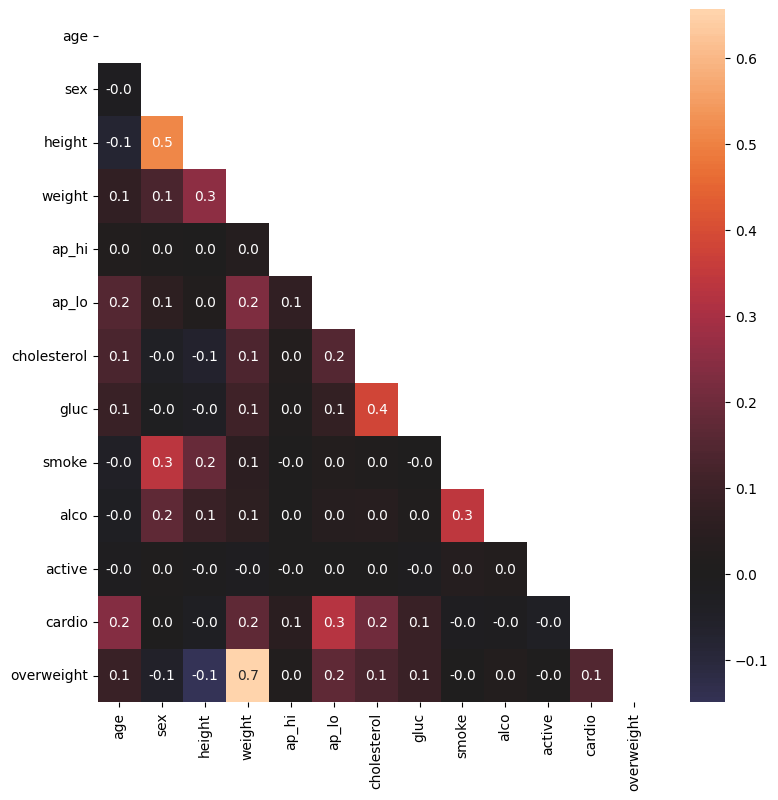

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            mask=mask,
            annot=True,
            fmt='.1f',
            center=0
            )



# Do not modify the next two lines
fig.savefig('heatmap.png')
#return fig